## 1.Load Task in Benchmark Quickly

Tutorial one is to load a task/env conveniently by simply giving task name and desired target embodiment (default is Franka).

In [1]:
!export VLABENCH_ROOT=/home/vla/Downloads/VLABench/VLABench
!export MUJOCO_GL=egl

In [ ]:
import os
os.environ["MUJOCO_GL"] = "egl"
os.environ["VLABENCH_ROOT"] = "/home/vla/Downloads/VLABench/VLABench"

In [2]:
import os
import json
from PIL import Image
from dm_control import viewer
from VLABench.envs import load_env
from VLABench.robots import *
from VLABench.tasks import *
from VLABench.configs import name2config
from VLABench.utils.utils import find_key_by_value


/home/vla/anaconda3/envs/vlabench/lib/python3.10/site-packages/glfw/__init__.py:917: GLFWError: (65550) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Set the embodiment and task 

In [3]:
task = "select_fruit"
robot = "franka"

If run this tutorial on server instead of PC, run in headless mode.

In [4]:
os.environ["MUJOCO_GL"] = "egl"
# os.environ["MUJOCO_GL"] = "glfw"

###  1.1Load task and build environment

In [5]:
!ls -l /home/vla/Downloads/VLABench/VLABench/configs/

total 156
drwxrwxr-x 2 vla vla  4096 Sep 11 19:57 camera
-rw-rw-r-- 1 vla vla  4138 Jun 11 15:03 camera_config.json
-rw-rw-r-- 1 vla vla 30188 Sep  2 01:49 constant.py
drwxrwxr-x 3 vla vla  4096 Jun 11 15:03 evaluation
-rw-rw-r-- 1 vla vla  2763 Aug 29 13:23 __init__.py
drwxrwxr-x 3 vla vla  4096 Sep 11 15:40 langgraph
drwxrwxr-x 2 vla vla  4096 Jun 11 15:03 model
drwxrwxr-x 2 vla vla  4096 Jun 11 15:03 prompt
drwxrwxr-x 2 vla vla  4096 Sep  2 21:48 __pycache__
-rw-rw-r-- 1 vla vla   904 Jun 11 15:03 robot_config.json
-rw-rw-r-- 1 vla vla  2682 Jun 11 15:03 scene_config.json
-rw-rw-r-- 1 vla vla 33438 Jun 11 15:03 task2code.json
-rw-rw-r-- 1 vla vla 38894 Sep 11 19:57 task_config.json
drwxrwxr-x 2 vla vla  4096 Jun 11 15:03 task_related


In [6]:
!echo $MUJOCO_GL

egl


Each time you load the single env, each instance varies in a large range.

In [7]:
env = load_env(task, robot=robot, time_limit=1000)
env.reset()

image = env.render(camera_id=2, width=640, height=640)
Image.fromarray(image)

/home/vla/anaconda3/envs/vlabench/lib/python3.10/site-packages/glfw/__init__.py:917: GLFWError: (65537) b'The GLFW library is not initialized'
  warnings.warn(message, GLFWError)


FatalError: gladLoadGL error

In [8]:
obs=env.get_observation()
obs

{'q_state': array([ 2.95987777e-06, -1.04758420e+00,  3.17353756e-03, -2.63995536e+00,
        -4.40926257e-03,  1.53563645e+00, -2.31999842e+00]),
 'q_velocity': array([ 3.00549191e-06, -2.04173632e-03,  9.75554478e-04, -2.38824520e-02,
        -1.29761598e-03, -4.19126729e-03,  2.02324655e-06]),
 'q_acceleration': array([ 1.27930789e-03,  6.75749215e-02, -1.12792787e-02,  3.56739839e-01,
         1.54173039e-02,  1.85087997e-02, -3.55609045e-04]),
 'rgb': array([[[[ 90,  90,  89],
          [ 90,  89,  88],
          [ 76,  76,  76],
          ...,
          [142, 140, 136],
          [142, 139, 135],
          [142, 139, 135]],
 
         [[134, 132, 128],
          [133, 130, 127],
          [132, 129, 125],
          ...,
          [141, 139, 134],
          [141, 138, 133],
          [142, 139, 135]],
 
         [[132, 130, 126],
          [132, 129, 126],
          [132, 129, 125],
          ...,
          [141, 138, 134],
          [142, 140, 135],
          [142, 140, 136]],
 

### 1.2Run in interactive viewer

In [28]:
viewer.launch(env)

## 2.Overview of Primitive Tasks

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

def plot_images(images, instructions, titles, max_columns=5, max_text_width=30):
    assert len(images) == len(instructions) == len(titles), "images should have the same length as instructions and titles"
    num_images = len(images)
    num_rows = (num_images + max_columns - 1) // max_columns
    fig, axes = plt.subplots(num_rows, max_columns, figsize=(max_columns * 3, num_rows * 3))
    axes = axes.flatten()
    for i, (image, instruction, title) in enumerate(zip(images, instructions, titles)):
        if np.max(image) <= 1:
            image = (image * 255).astype(np.uint8)
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(title, fontsize=14)
        wrapped_instruction = textwrap.fill(instruction, width=max_text_width)
        ax.text(0.5, -0.1, wrapped_instruction, ha='center', va='top', transform=ax.transAxes, fontsize=12)
        
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
def load_env_and_render(task, robot, **kwargs):
    env = load_env(task, robot=robot, **kwargs)
    env.reset()

    image = env.render(camera_id=2, width=480, height=480)
    instruction = env.task.get_instruction()
    return image, instruction

### 2.1 Basic Scene: Mesh&Texture 

Default Setting: no additional domain randomization, no texture and scene augmenation

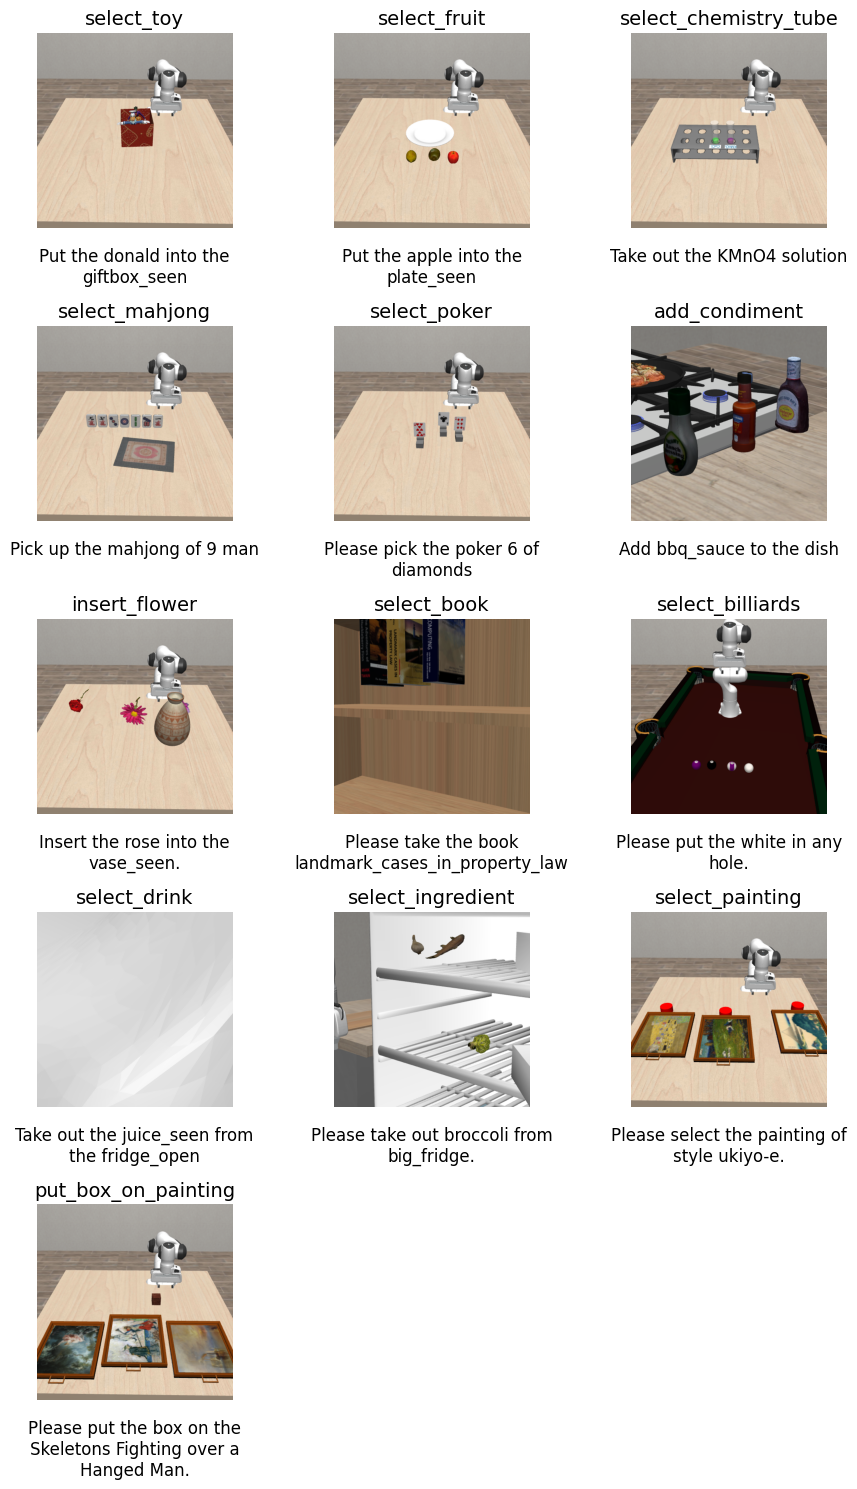

In [13]:
tasks_to_load = ["select_toy", "select_fruit", "select_chemistry_tube", "select_mahjong", "select_poker", "add_condiment", "insert_flower", "select_book", "select_billiards", "select_drink", "select_ingredient", "select_painting","put_box_on_painting"]
images, instructions = [], []
for task in tasks_to_load:
    try:
        image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
        images.append(image)
        instructions.append(instruction)
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Failed to load task {task}: {e}")
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)


### 2.2 Common Sense & World Knowledge

The base environment for Common Sense & World Knowledge type tasks quering LLM to generate task instructions by default. We also recommend to generate the instructions in batch later.

In [14]:
tasks_to_load = ["hammer_loose_nail"]

### 2.3 Spatial Understanding

The base environment for spatial understanding generate the relative spatial relationships between target entity and other entities by task-specific rules.

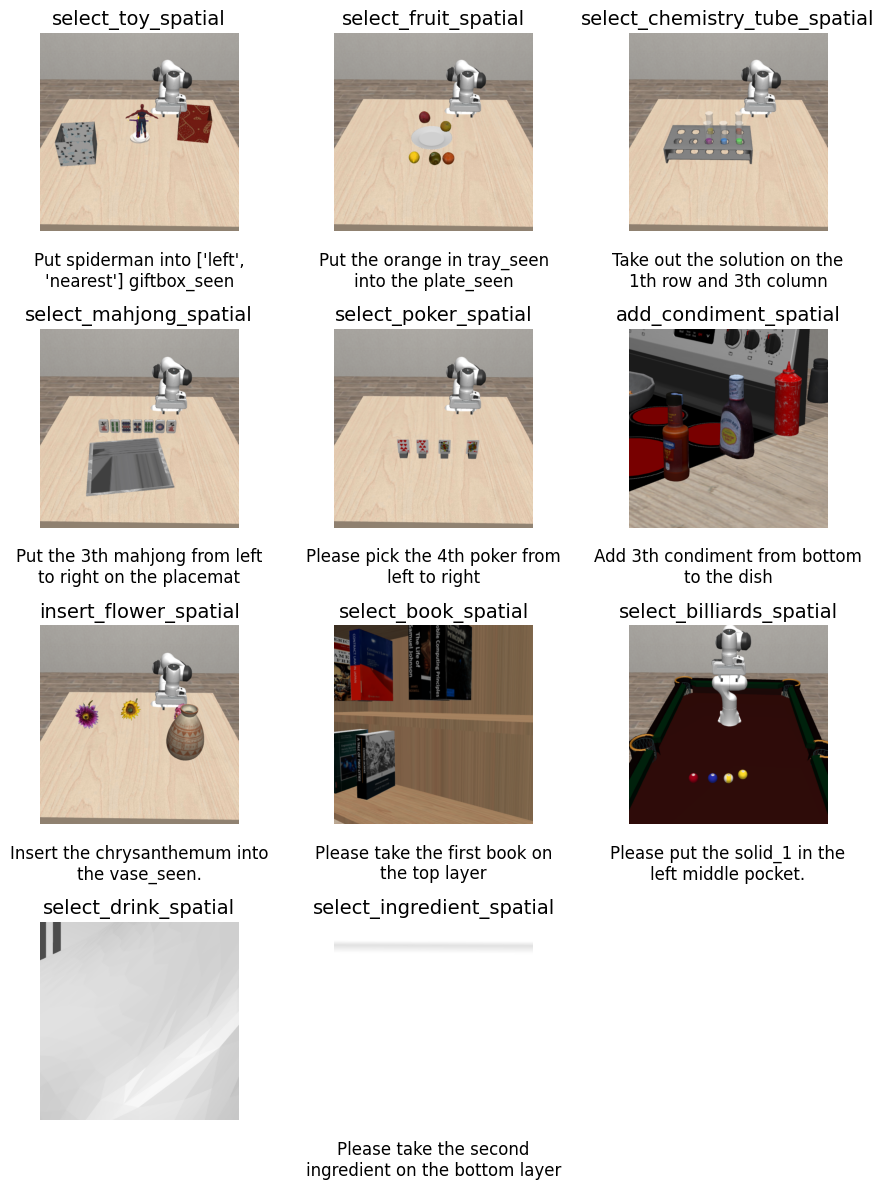

In [15]:
tasks_to_load = ["select_toy_spatial", "select_fruit_spatial", "select_chemistry_tube_spatial", "select_mahjong_spatial", "select_poker_spatial", "add_condiment_spatial", "insert_flower_spatial", "select_book_spatial", "select_billiards_spatial", "select_drink_spatial", "select_ingredient_spatial"]
# "", "select_poker", "add_condiment", "insert_flower", "select_book", "select_billiards", "select_drink", "select_ingredient", "select_painting","put_box_on_painting"
images, instructions = [], []
robot="franka"
for task in tasks_to_load:
    try:
        image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
        images.append(image)
        instructions.append(instruction)
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Failed to load task {task}: {e}")
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)

### 2.4 Semantic Understanding

In [17]:
tasks_to_load = ["select_toy_semantic", "select_fruit_semantic"]
for task in tasks_to_load:
    try:
        image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
        images.append(image)
        instructions.append(instruction)
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Failed to load task {task}: {e}")


In [18]:
instructions

["Put spiderman into ['left', 'nearest'] giftbox_seen",
 'Put the orange in tray_seen into the plate_seen',
 'Take out the solution on the 1th row and 3th column',
 'Put the 3th mahjong from left to right on the placemat',
 'Please pick the 4th poker from left to right',
 'Add 3th condiment from bottom to the dish',
 'Insert the chrysanthemum into the vase_seen.',
 'Please take the first book on the top layer',
 'Please put the solid_1 in the left middle pocket.',
 '',
 'Please take the second ingredient on the bottom layer',
 "It's a conversation",
 "tell some specifics of apple between ['apple', 'pear', 'lemon']"]

## 3.Overview of Composite Tasks

### 3.1Cluster series tasks

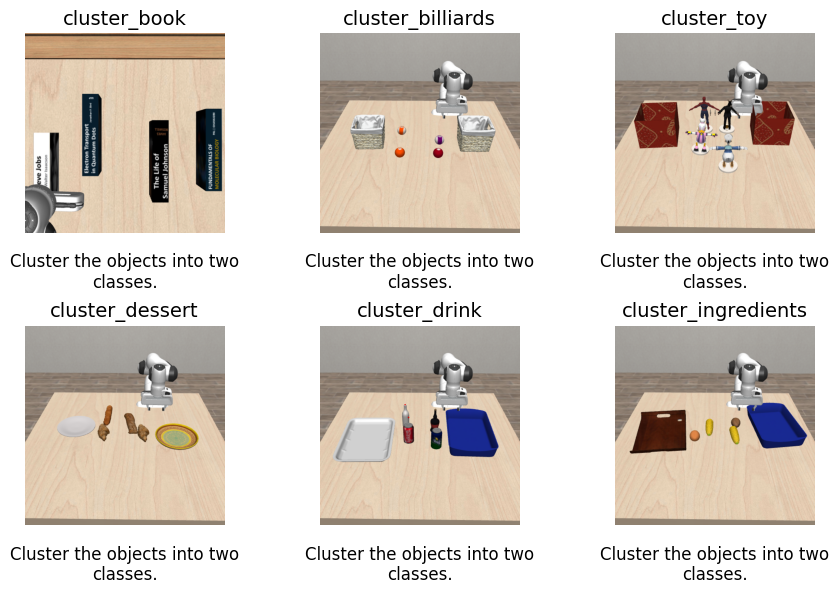

In [19]:
tasks_to_load = ["cluster_book", "cluster_billiards", "cluster_toy", "cluster_dessert", "cluster_drink", "cluster_ingredients"]
images, instructions = [], []
for task in tasks_to_load:
    image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
    images.append(image)
    instructions.append(instruction)
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)

### 3.2 Other Composite Tasks 

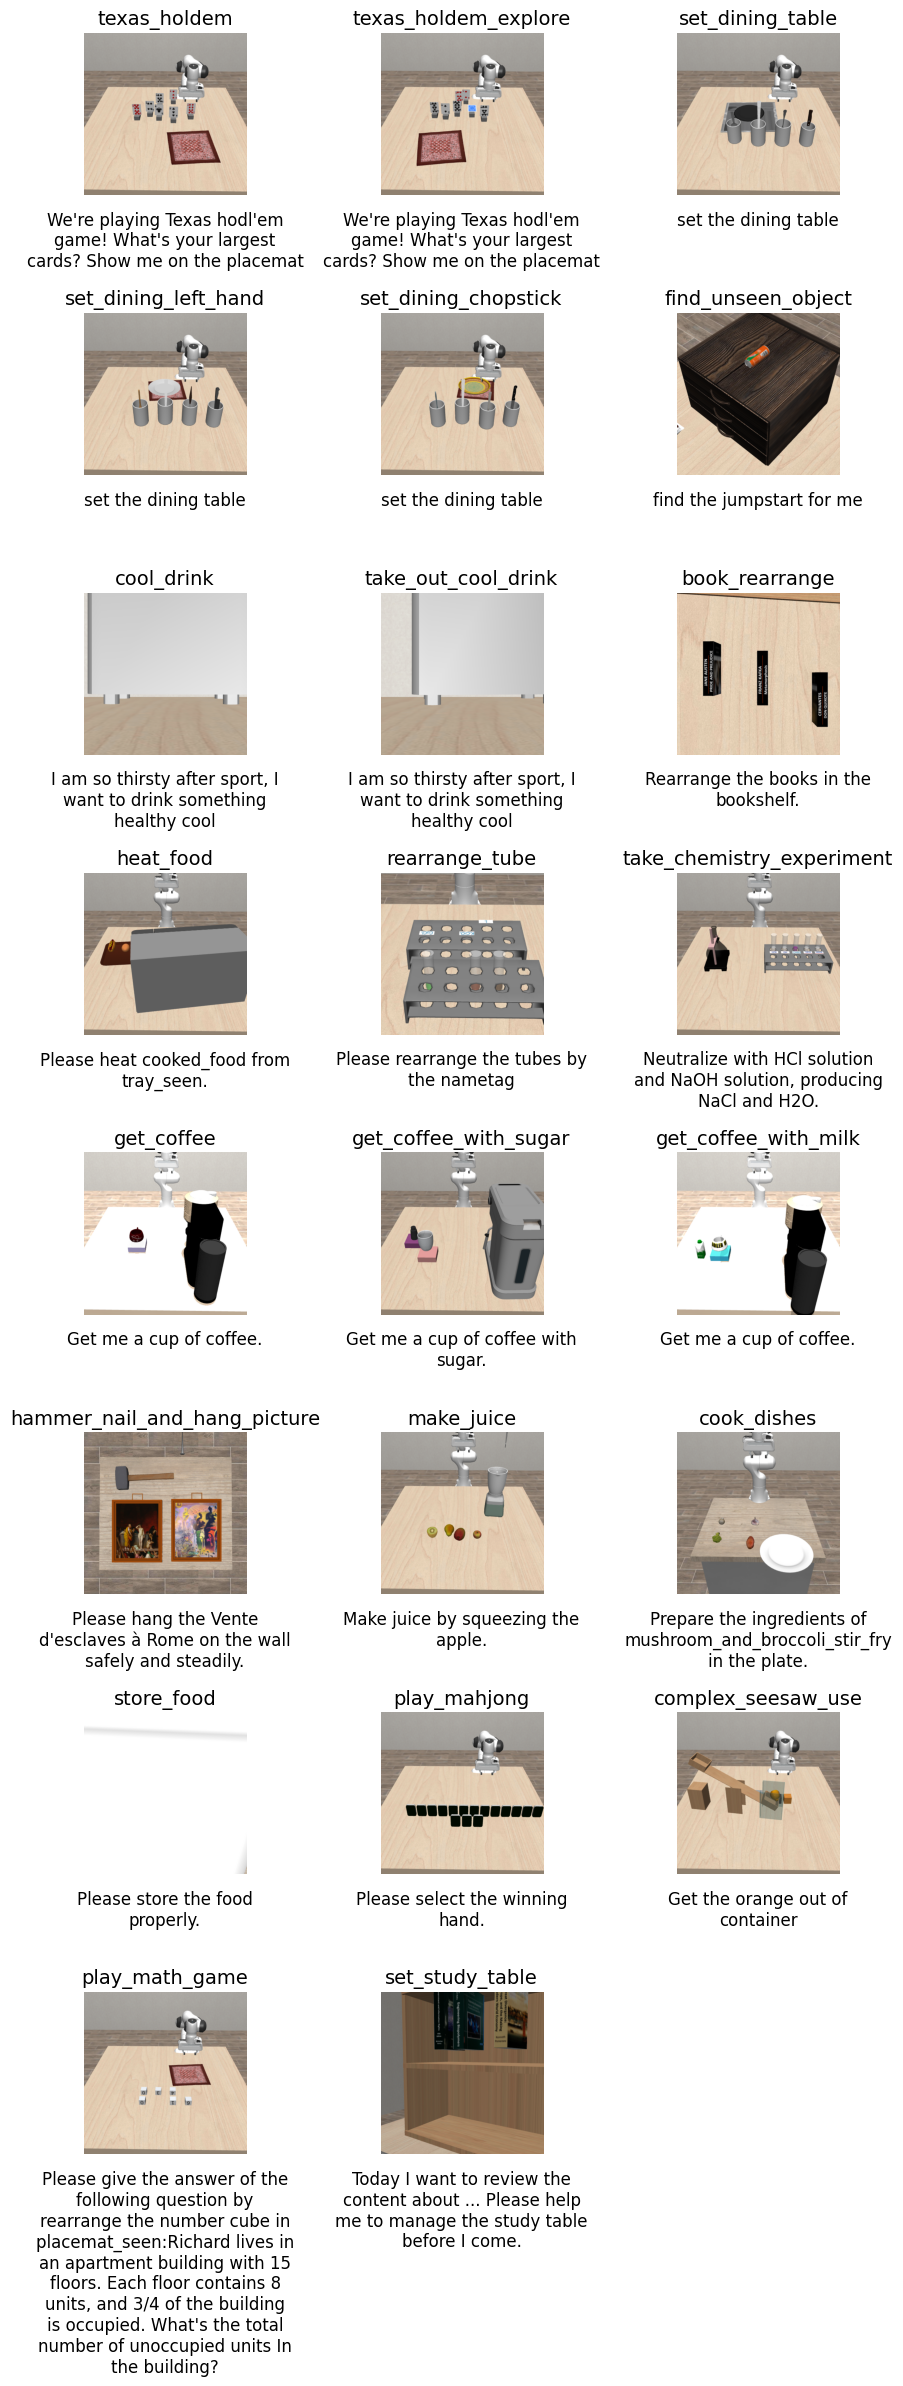

In [20]:
tasks_to_load = ["texas_holdem", "texas_holdem_explore", "set_dining_table", "set_dining_left_hand", "set_dining_chopstick", "find_unseen_object", "cool_drink", "take_out_cool_drink", "book_rearrange", "heat_food", "rearrange_tube", "take_chemistry_experiment", "get_coffee", "get_coffee_with_sugar", "get_coffee_with_milk", "hammer_nail_and_hang_picture", "make_juice", "cook_dishes", "store_food", "play_mahjong", "complex_seesaw_use", "play_math_game", "set_study_table"]
images, instructions = [], []
for task in tasks_to_load:
    image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
    images.append(image)
    instructions.append(instruction)
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)